# Electricity demand forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from meteostat import Hourly

In [9]:
# Load and clean the data from power plant
df = pd.read_csv('data/raw_data.csv', delimiter=';')
df = df[df['Power [MW]'] != '-']
df['Power [MW]'] = df['Power [MW]'].str.replace(',', '.').astype(float)
df[['Date', 'Time']] = df['Date'].str.split(' ', expand=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y').dt.strftime("%Y-%m-%d")
df = df.reindex(columns=['Date', 'Time', 'Power [MW]'])

In [ ]:
# fetch holiday data
years = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.strftime("%Y").unique()
holiday_dates = []
for year in years:
    url = f"https://digidates.de/api/v1/germanpublicholidays?year={year}&region=de-be"
    response = requests.get(url)
    holidays = response.json()
    [holiday_dates.append(holiday) for holiday in holidays.keys()]

holiday_df = pd.DataFrame(data={"Date": holiday_dates})
holiday_df.to_csv('data/holidays.csv')

df['Holiday'] = df['Date'].isin(holiday_dates)
df.head()

AttributeError: 'list' object has no attribute 'to_csv'

In [21]:
# fetch weather data
# start = min(pd.to_datetime(df['Date'], format='%Y-%m-%d'))
# latest_date = pd.to_datetime(df['Date'], format='%Y-%m-%d').max().strftime('%Y-%m-%d')
# latest_time = df.loc[df['Date'] == latest_date, 'Time'].max()
# end = pd.to_datetime(f"{latest_date} {latest_time}")

# weather = Hourly('10384', start, end)
# weather = weather.fetch()
# weather.to_csv('data/weather_data.csv')

weather = pd.read_csv('data/weather_data.csv')

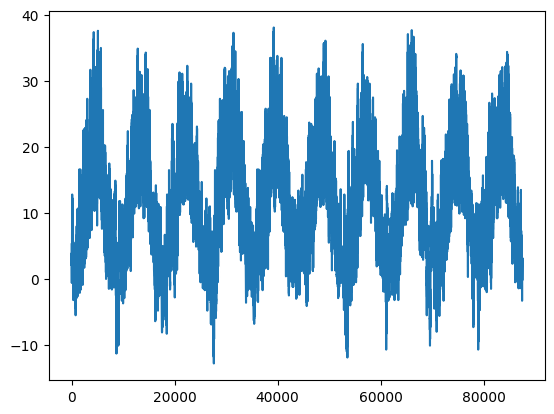

In [22]:
plt.plot(weather['temp'])